# Sampling and the Central Limit Theorem

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
from scipy import stats

%matplotlib inline

## Agenda 

SWBAT:
- Differentiate between population and sample;
- Define and calculate standard error;
- Use `numpy` to randomly sample a distribution;
- Describe the Central Limit Theorem and connect it to our knowledge of distributions and sampling.

## Descriptive vs Inferential Statistics

- Descriptive Statistics
   > Simply describe what is observed. The average height of a player on a high school football team can be directly calculated by measuring all of the current players' heights.
  
- Inferential statistics 
    > Say something general about a larger group of subjects than those we have measured. For example, we would be doing inferential statistics if we used the information about our team above to say something about the average height of *all* high school football players.

    - To put it another way, statistical inference is the process by which we take observations of a subset of a group and generalize to the whole group.

## Population Inference

The mayor's office has hired Flatiron Data Science Immersive students to determine a way to fix traffic congestion. A good starting point is to determine what proportion of the population of Seattle owns a car.

In order for us to make any determinations about a population, we must first get information about it.

Because it's usually completely impractical to get data about *everyone* in a population, we must take a sample.

### Key Terms

 - the entire group is known as the **population**  
 - the subset is a known as the **sample**

![pop](./img/sample_pop.png)

- We would use samples if the population is:
    - Too big to enumerate
    - too difficult/time consuming or expensive to sample in its entirety.

**Random sampling is not easy to do**  
Continuing our Seattle car example, how would we take a sample? 

Here are two strategies we might employ:

* Stand outside of Flatiron at 12 pm and ask random people until *n* responses


* Go to a randomly assigned street corner and at a random time and ask *n* people if they own a car

Which strikes you as better?

What do we want our sample to look like?

In particular, what relationship do we want between the sample and the population? What steps can we take to improve our odds of success in achieving this?

## Population vs. Sample Terminology

Characteristics of populations are called **parameters**

Characteristics of a sample are called **statistics**

A sample statistic is a **point estimate** of the population parameter

![imgsample](./img/sample_stats.png)

## A Simulation to Reinforce Our Definitions

Let's create a population of systolic blood pressure of adult males in Chicago, assuming a mean of 114 mmHg with a standard deviation of 11 mmHg.  We will also assume the adult male population to be 1.5 million. 

It is impossible to measure the systolic blood pressure of every man in Chicago, but let's assume multiple investigations have led to the conclusion the the mean and std of this population is 114 and 11, respecively. These are therefore estimators of the population parameter.

$\Large\hat\mu = 114$  
$\Large\hat\sigma = 11$



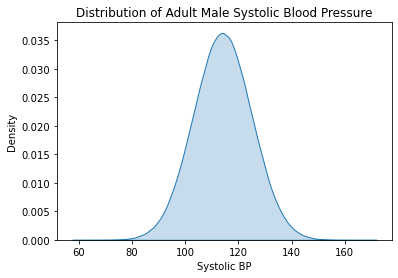

In [2]:
pop = int(1.5*10**6)

# Use numpy to generate a normal distribution of the 
sys_pop = np.random.normal(loc=114, scale=11, size=pop)

fig, ax = plt.subplots()

sns.kdeplot(sys_pop, ax=ax, shade=True)
ax.set_title('Distribution of Adult Male Systolic Blood Pressure')
ax.set_xlabel('Systolic BP');

Let's then imagine we develop an effective manner of random sampling, and simulate with numpy. Our sample size is 40 people.


In [3]:
sample_size = 40
sample = np.random.choice(sys_pop, sample_size)

# We can look at the distribution of the values in the sample.

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


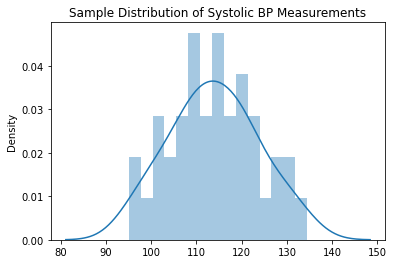

In [4]:
fig, ax = plt.subplots()
sns.distplot(sample, ax=ax, bins=15)
ax.set_title('Sample Distribution of Systolic BP Measurements');

We can then calculate the sample statistics:

In [5]:
print(f'Sample mean: {sample.mean()}')
print(f'Sample standard deviation: {sample.std()}')
print(f'Sample median: {np.median(sample)}')

Sample mean: 113.87196020989477
Sample standard deviation: 9.588561395317145
Sample median: 113.87515228536785


If we repeated this process, taking samples of the population repeatedly, we would get an array of sample statistics.

In [6]:
number_of_samples = 1000
sample_size = 50
sample_stats = []

for _ in range(number_of_samples):
    sample = np.random.choice(sys_pop, sample_size)
    # collect the mean of each of the 1000 samples in sample stats
    sample_stats.append(sample.mean())

The collection of sample stats represents our __sampling distribution__

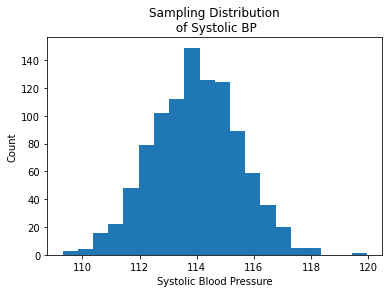

In [7]:
fig, ax = plt.subplots()
ax.hist(sorted(sample_stats), bins=20)
ax.set_title('Sampling Distribution\n of Systolic BP')
ax.set_xlabel("Systolic Blood Pressure")
ax.set_ylabel('Count');

An interesting property of this sampling distribution:
    
As we continue to sample, the mean of the sampling distribution gets closer and closer to the population mean.

### Standard Error of the Mean

The standard error of the mean is the standard deviation of the sampling distribution.
The issue is that a sample is not an exact replica of the population. We need to account for that fact in order to make our estimate of the $\mu$ value possible. Let's break it down:

**Population sigma** <br/>

$\large\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population sigma?**<br>
If we do not know the population standard deviation, we can approximate it by using the sample standard deviation.

$\large\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

* s = sample standard deviation

**Sample size impact on standard error of mean**<br>

How should sample size influence standard error of the mean?

It will get *smaller* as sample size *increases*

![error](./img/diminishing_error.png)  
Important implication: The Standard Error of the mean remains the same as long as the population standard deviation is known and sample size remains the same.


In [8]:
def standard_error(distribution, largest_sample_size, population_std=None):
    
    '''
    Calculate the standard errors for a range of sample sizes
    to demonstrate how standard error decreases when sample 
    size increases.
    '''
 
    std_errors = {}
    
    for sample_size in range(50, largest_sample_size+1):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        # Standard error with sample distribution standard deviation 
        # in place of population
        if population_std == None:
            std_err = np.std(sample)/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
        else:
            std_err = population_std/np.sqrt(sample_size)
            std_errors[sample_size] = std_err
        
    return std_errors

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


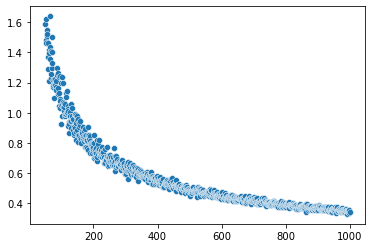

In [9]:
std_errors = standard_error(sys_pop, 1000)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()));

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


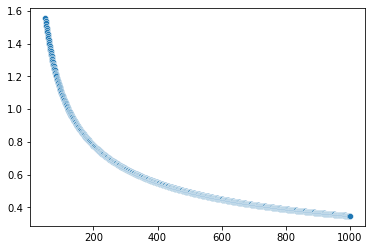

In [10]:
std_errors = standard_error(sys_pop, 1000, population_std=11)

fig, ax = plt.subplots()

sns.scatterplot(list(std_errors.keys()), list(std_errors.values()));

## Central Limit Theorem

If we take repeated samples of a population, the sampling distribution of sample means will approximate to a normal distribution, no matter the underlying distribution!

## $E(\bar{x_{n}}) = \mu$

as n --> "large"

[good D3 example](https://seeing-theory.brown.edu/probability-distributions/index.html)

[good video demonstration](https://www.youtube.com/watch?v=jvoxEYmQHNM)


Let's look at an example taken from the ubiquitous Iris dataset. This histogram represents the distributions of sepal length:


![probgif](./img/probability-basics.gif)

https://www.kaggle.com/tentotheminus9/central-limit-theorem-animation

As we will see in hypothesis testing, pairing this theorem with the Empirical rule will be very powerful.

![empirical](img/empirical_rule.png)



Knowing that any sampling distribtion, no matter the underlying population distribution, will approach normality, we will be able to judge, given the empirical rule, how rare a given sample statistic is.  

### Bike Example
Capital bike share is trying to figure out their pricing for members versus non-members. The first step in their analysis is to see if members vs non-members ride for different amounts of time per ride.

Let's head over [here](https://s3.amazonaws.com/capitalbikeshare-data/index.html) for some DC bike data!

In [14]:
df = pd.read_csv('202101-capitalbikeshare-tripdata.csv')

In [15]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
100065,529EE3768D7AC5DF,electric_bike,2021-01-10 18:40:27,2021-01-10 18:49:54,Washington Blvd & 10th St N,31026.0,Walter Reed Dr & 8th St S,31096.0,38.884770,-77.093536,38.866188,-77.087875,casual
100066,3738AB785B0F150C,electric_bike,2021-01-30 15:08:00,2021-01-30 15:13:50,18th St & Wyoming Ave NW,31114.0,Lamont & Mt Pleasant NW,31107.0,38.918744,-77.041576,38.931875,-77.038707,member
100067,34233F7DC72C785A,classic_bike,2021-01-11 17:48:07,2021-01-11 17:57:43,18th St & Wyoming Ave NW,31114.0,Lamont & Mt Pleasant NW,31107.0,38.918809,-77.041571,38.931900,-77.038800,member
100068,E409D5CC20E6A584,classic_bike,2021-01-20 15:35:24,2021-01-20 15:58:46,3rd St & Pennsylvania Ave SE,31269.0,15th & F St NE,31632.0,38.887378,-77.001955,38.897195,-76.983575,member
100069,61DF1B6B268D469F,classic_bike,2021-01-27 09:24:06,2021-01-27 09:28:04,18th St & Wyoming Ave NW,31114.0,13th & U St NW,31132.0,38.918809,-77.041571,38.916936,-77.029631,member


### Let's take a look at the shape of our dataset

In [16]:
df['Duration'] = pd.to_datetime(df['ended_at']) - pd.to_datetime(df['started_at'])

In [17]:
df['Duration'] = df['Duration'].dt.total_seconds()

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


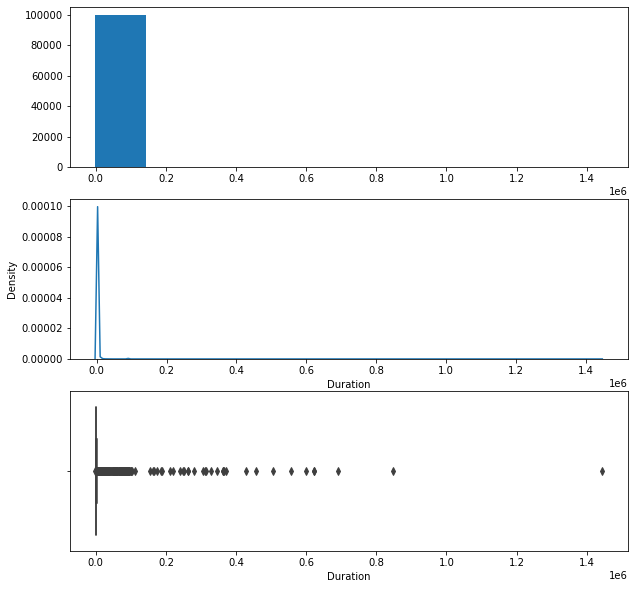

In [18]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].hist(df.Duration)
sns.kdeplot(df.Duration, ax=ax[1])
sns.boxplot(df.Duration, ax=ax[2]);

The shape is difficult to see because of the outliers. Let's remove some to get a better sense of the shape:

#### Removing outliers

In [19]:
df[df['Duration'] < 0].shape[0]

df = df[df['Duration'] >= 0]

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


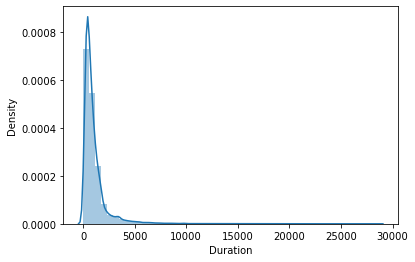

In [20]:
pop_no_outliers = df[np.abs(stats.zscore(df.Duration)) < 3]

fig, ax = plt.subplots()
sns.distplot(pop_no_outliers.Duration);

In [21]:
member_df = df[df['member_casual'] == 'member']
casual_df = df[df['member_casual'] == 'casual']

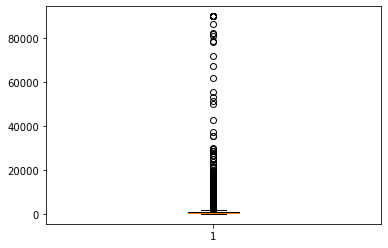

In [22]:
plt.boxplot(member_df['Duration']);

In [23]:
print(member_df.shape)
sum(abs(stats.zscore(member_df.Duration)) > 3)

(66679, 14)


294

In [24]:
member_df_nooutliers = member_df[np.abs(stats.zscore(member_df.Duration)) < 3]
member_df_nooutliers.shape

(66385, 14)

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


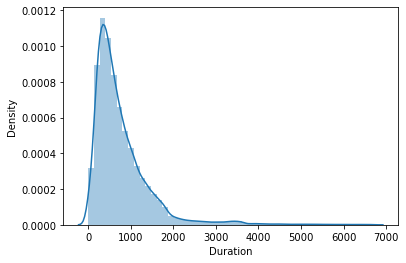

In [25]:
fig, ax = plt.subplots()
sns.distplot(member_df_nooutliers.Duration, bins=50, ax=ax);

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


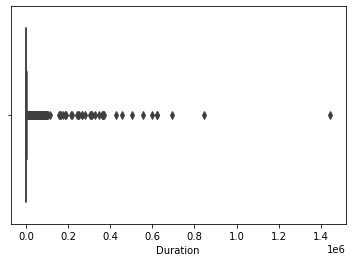

In [26]:
fig, ax = plt.subplots()
sns.boxplot(casual_df.Duration);

In [27]:
casual_df_nooutliers = casual_df[np.abs(stats.zscore(casual_df.Duration)) < 3]

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


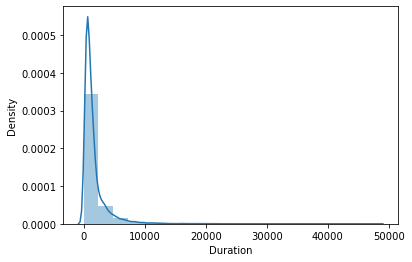

In [28]:
fig, ax = plt.subplots()
sns.distplot(casual_df_nooutliers.Duration, bins=20, ax=ax);

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


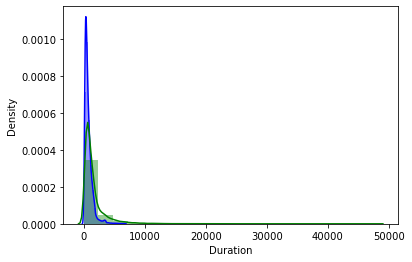

In [29]:
fig, ax = plt.subplots()
sns.distplot(member_df_nooutliers.Duration, bins=20, ax=ax, color='blue')
sns.distplot(casual_df_nooutliers.Duration, bins=20, ax=ax, color='green');

#### Get population statistics

In [30]:
df.median()

start_station_id    31276.000000
end_station_id      31275.000000
start_lat              38.905697
start_lng             -77.031737
end_lat                38.905424
end_lng               -77.031737
Duration              685.000000
dtype: float64

Let's treat the whole dataset as our population.

In [31]:
pop_mean = df.Duration.mean()
pop_std = df.Duration.std()
print(f'pop_mean is {pop_mean} \npop_std is {pop_std}')

pop_mean is 1343.871372321714 
pop_std is 9144.425556056633


In [32]:
def one_sample_mean(population):
    sample = np.random.choice(population, size=200, replace=True)
    return sample.mean()

In [33]:
one_sample_mean(df.Duration)

1063.94

### When we take multiple samples from the distribution,and plot the means of each sample, the shape of the curve shifts

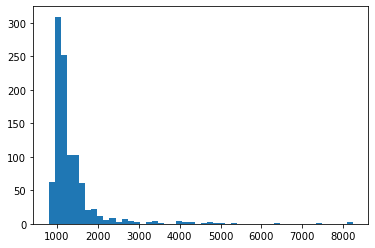

In [34]:
d = [one_sample_mean(df.Duration) for i in range(1000)]
plt.hist(d, bins=50);

In [35]:
def central_limit_theorem_plotter(distribution, sample_size, num_samples, color='blue'):
    sample_means = np.zeros(num_samples)
    for idx, num in enumerate(range(num_samples)):
        sample = np.random.choice(distribution, size=sample_size, replace=True)
        sample_means[idx] = sample.mean()
    sns.distplot(sample_means, bins=80, kde=True,  color=color)
    title = f'Sample Distribution n = {sample_size} and number of samples = {num_samples},\
    std error = {pop_std / num_samples}'
    print(f'mean = {sample_means.mean()}')
    plt.title(title)

### The number of samples drives the shape of the curve more than the sample size itself


mean = 1332.82927


/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


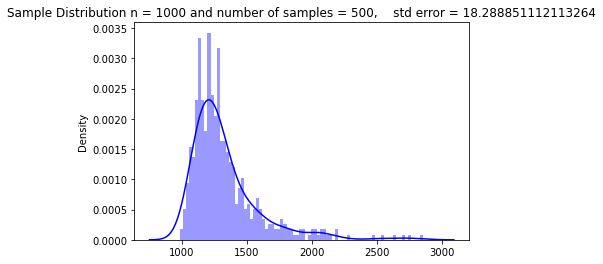

In [36]:
central_limit_theorem_plotter(df.Duration, 1000, 500);

### Larger sample size, Fewer samples

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 1351.1137399999998


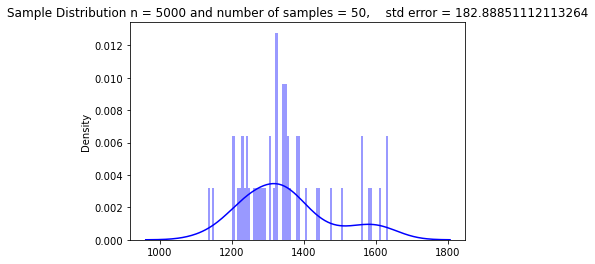

In [37]:
central_limit_theorem_plotter(df.Duration, 5000, 50);

* What happens as we increase the sample size?
* How does the height of the distribution change? Why does it change?

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


mean = 852.945154
mean = 2345.326144


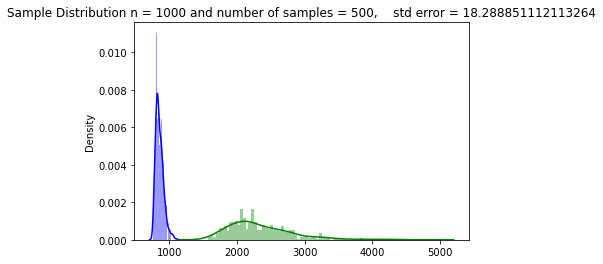

In [38]:
central_limit_theorem_plotter(member_df.Duration, 1000, 500, 'blue')
central_limit_theorem_plotter(casual_df.Duration, 1000, 500, 'green')